In [14]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

sns.set_style('darkgrid')

from pathlib import Path

import warnings
warnings.filterwarnings('ignore')

from IPython.display import display
pd.options.display.max_columns = None

%matplotlib inline

In [15]:
HOME = Path().resolve().parent.parent
data_dir = str(HOME) + '/data/processed/'

In [16]:
listings = pd.read_csv(data_dir + 'listings_transformed.csv.gz')
listings.shape

(456987, 24)

### How many listings are available during the year?

In [19]:
df = listings[['id', 'availability_60', 'year', 'month']].groupby(
    ['year', 'month'], as_index=False).agg({'id': 'count', 'availability_60': 'mean'})

In [20]:
df['date'] = df[['year', 'month']].apply(lambda x: datetime(x['year'], x['month'], 1), axis=1)

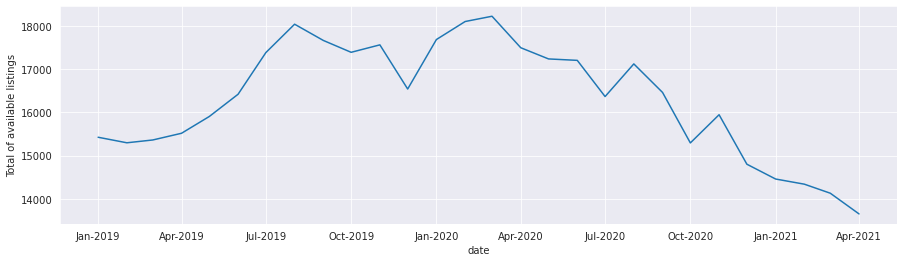

In [21]:
g, ax = plt.subplots(figsize=(15, 4))
sns.lineplot(x='date', y='id', data=df, ax=ax)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
ax.set_ylabel('Total of available listings')
plt.show()

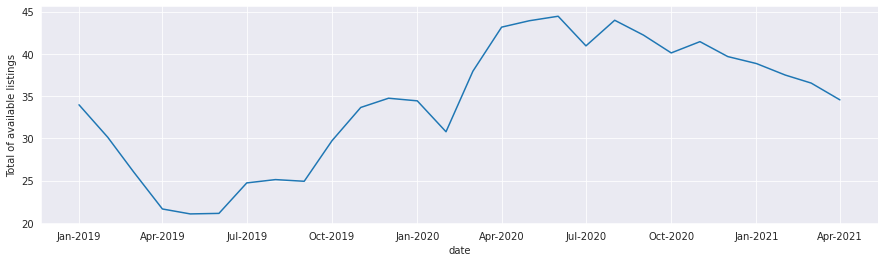

In [22]:
g, ax = plt.subplots(figsize=(15, 4))
sns.lineplot(x='date', y='availability_60', data=df, ax=ax)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
ax.set_ylabel('Total of available listings')
plt.show()

In [26]:
df = listings[['id', 'availability_60', 'year', 'month']].groupby(
    ['id'], as_index=False).count()

In [31]:
df[df.month == 28]

,id,availability_60,year,month
15,35379,28,28,28
17,35390,28,28,28
19,36763,28,28,28
22,46153,28,28,28
27,61444,28,28,28
...,...,...,...,...
19673,31549575,28,28,28
19677,31550583,28,28,28
19681,31551988,28,28,28
19684,31552495,28,28,28


In [32]:
df.id

0           18666
1           18674
2           21605
3           21974
4           23197
           ...   
41726    49155035
41727    49155115
41728    49155172
41729    49155456
41730    49158347
Name: id, Length: 41731, dtype: int64